<a href="https://colab.research.google.com/github/Hchama/YOLO-DEEPSORT/blob/main/HYPERPARAMETER_3_VIDEO_OUTPUT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone Repo

In [ ]:
!git clone https://github.com/deshwalmahesh/yolov7-deepsort-tracking
%cd yolov7-deepsort-tracking
!rm tracking_helpers.py

Cloning into 'yolov7-deepsort-tracking'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 186 (delta 12), reused 9 (delta 6), pack-reused 158
Receiving objects: 100% (186/186), 68.18 MiB | 25.03 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/yolov7-deepsort-tracking


In [ ]:
!gdown --id "15cpg9F-GpxUhHJM4JphK7tl5zKxw4iQu&confirm=t"
!gdown --id "16Ywn0mKrQXE49fui0nDkBFGbrnpLwITZ&confirm=t"
!gdown --id "1OcG_76Kh5BykRS7cpjha9lPwGEcdU7YB&confirm=t"
!gdown --id "1GL2c39jqEC_y9Il-J6O1yhafBnq362Ok&confirm=t"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15cpg9F-GpxUhHJM4JphK7tl5zKxw4iQu&confirm=t
To: /content/yolov7-deepsort-tracking/hyperparameter3.pt
100% 74.8M/74.8M [00:01<00:00, 55.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16Ywn0mKrQXE49fui0nDkBFGbrnpLwITZ&confirm=t
To: /content/yolov7-deepsort-tracking/6-7pm.mp4
100% 257M/257M [00:01<00:00, 130MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a fi

# Imports

In [ ]:
from detection_helpers import *
from tracking_helpers import *
from  bridge_wrapper import *
from PIL import Image

# Detection

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


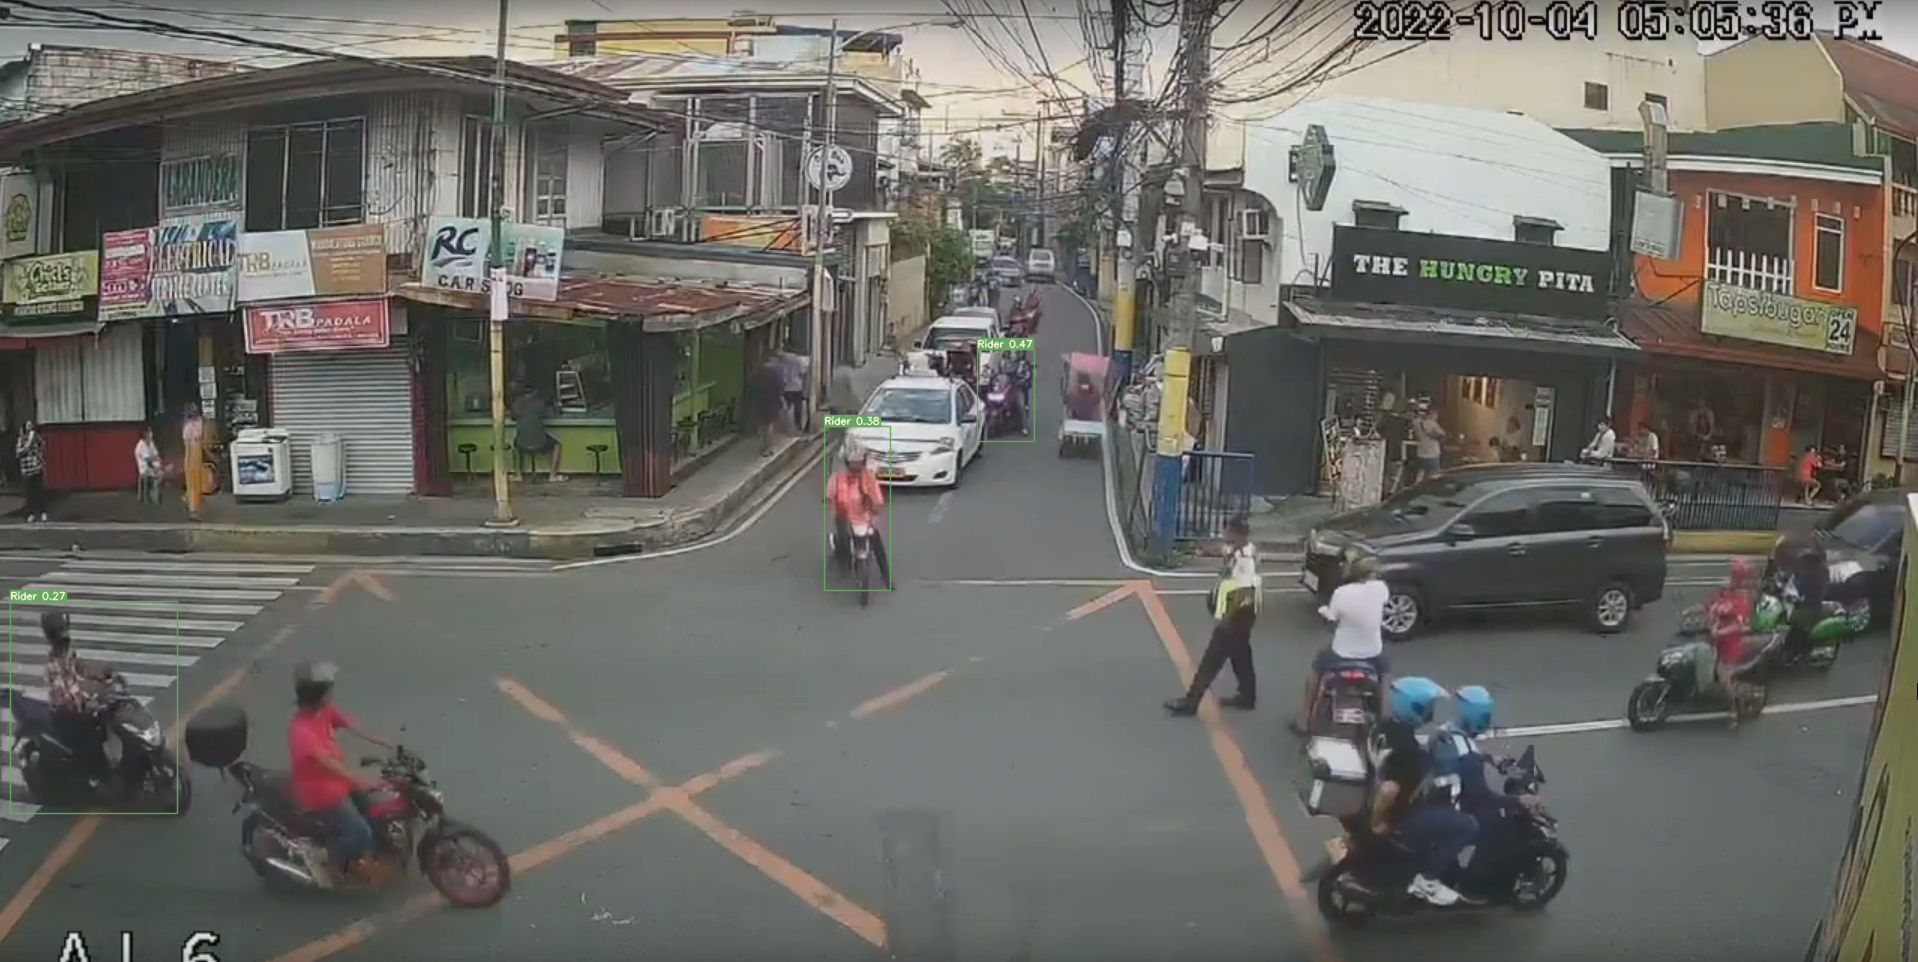

In [ ]:
detector = Detector(classes = None)
detector.load_model('./hyperparameter3.pt',)

# Pass in any image path or Numpy Image using 'BGR' format
result = detector.detect('/content/yolov7-deepsort-tracking/testimg.jpg', plot_bb = True) # plot_bb = False output the predictions as [x,y,w,h, confidence, class]


if len(result.shape) == 3:# If it is image, convert it to proper image. detector will give "BGR" image
    result = Image.fromarray(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))

result

# Tracking
**NOTE: Colab won't show you the video using `OpenCV` here. So keep `show_live = False` on `Colab`**

You can save the `AVI` video first, convert it to `MP4` and then render it given the steps below. [Follow this link for conversion and display](https://stackoverflow.com/questions/60977179/how-to-play-avi-file-in-google-colab)

In [ ]:
# Initialise  class that binds detector and tracker in one class
tracker = YOLOv7_DeepSORT(reID_model_path="./deep_sort/model_weights/mars-small128.pb", detector=detector)
tracker.track_video("./6-7pm.mp4", output="./IO_data/output/6-7pm.avi", show_live = False, skip_frames = 0, count_objects = True, verbose=2)

Streaming output truncated to the last 5000 lines.
Tracker ID: 438, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (599, 318, 671, 453)
Tracker ID: 449, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (435, 331, 539, 494)
Processed frame no: 2658 || Current FPS: 29.22 || Objects tracked: 3
Tracker ID: 425, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (-1, 328, 58, 430)
Tracker ID: 438, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (599, 316, 668, 447)
Tracker ID: 449, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (427, 331, 532, 496)
Processed frame no: 2659 || Current FPS: 26.44 || Objects tracked: 3
Tracker ID: 425, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (-1, 326, 56, 427)
Tracker ID: 438, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (598, 316, 667, 446)
Tracker ID: 449, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (417, 337, 521, 499)
Processed frame no: 2660 || Current FPS: 16.6 || Objects tracked: 3
Tracker ID: 425, Cl

In [ ]:
!zip avis.zip IO_data/output/*

  adding: IO_data/output/6-7pm.avi (deflated 1%)
  adding: IO_data/output/street.avi (deflated 3%)
  adding: IO_data/output/video.mp4 (deflated 1%)


In [ ]:
from google.colab import files
files.download('avis.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>